<a href="https://colab.research.google.com/github/Maryam-71295/Titanic-Survival-Predictions-Task3-EcodeCamp_Internship/blob/main/Task_3_Titanic_Ecodcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone 'https://github.com/Maryam-71295/Titanic-Survival-Predictions-Task3-EcodeCamp_Internship.git'

Cloning into 'Titanic-Survival-Predictions-Task3-EcodeCamp_Internship'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 77.46 KiB | 3.69 MiB/s, done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
file_path = '/content/train.csv'

In [5]:
df=pd.read_csv(file_path)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.shape

(891, 12)

In [9]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [11]:
df = df.drop(columns='Cabin', axis=1)

In [12]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

<ipython-input-12-5a433634f86f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace = True)


In [13]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


<ipython-input-13-808ebb813aa0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [14]:

df['Embarked'].isnull().sum()



0

In [15]:
df['Age'].isnull().sum()

0

In [16]:
df['family_size'] = df['SibSp'] + df['Parch'] + 1
print(df[['SibSp', 'Parch', 'family_size']].head())

   SibSp  Parch  family_size
0      1      0            2
1      1      0            2
2      0      0            1
3      1      0            2
4      0      0            1


In [17]:
df.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)
df.head()

<ipython-input-17-99a19bb921b2>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1


In [18]:
X=df.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
Y=df['Survived']
Y
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)
X_train.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0
family_size,0


In [19]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_size
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.361392,1.904602
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.635673,1.613459
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,1.000000
50%,446.000000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,11.000000


In [20]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [21]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

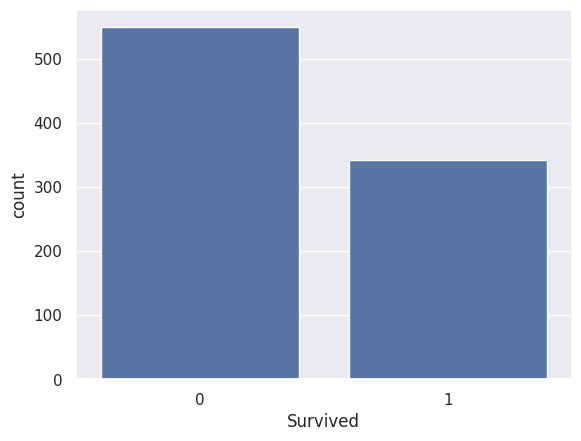

In [22]:
sns.countplot(x='Survived', data=df)

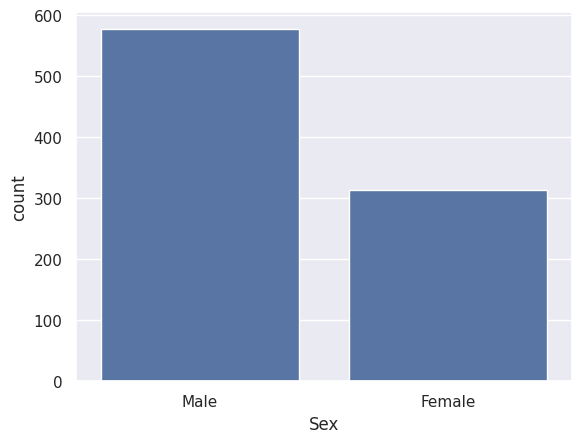

In [23]:
sns.countplot(x='Sex', data=df)
plt.xticks([0, 1], ['Male', 'Female'])

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


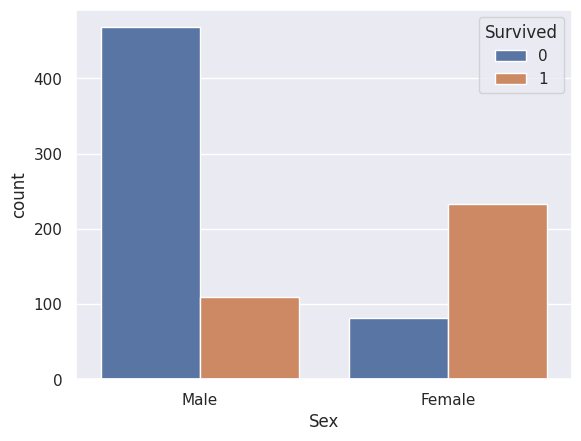

In [24]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.xticks([0, 1], ['Male', 'Female'])

# Show the plot
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

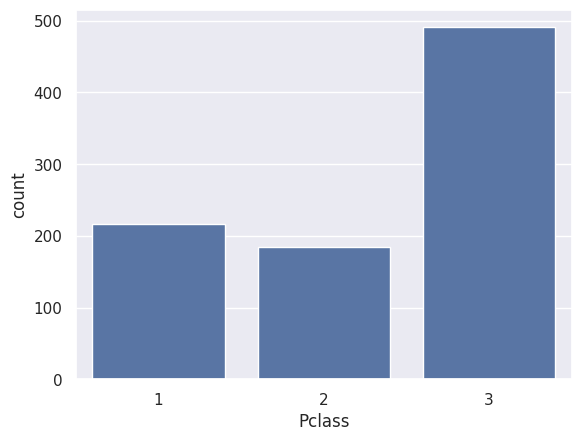

In [25]:
sns.countplot(x='Pclass', data=df)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Pclass', ylabel='count'>

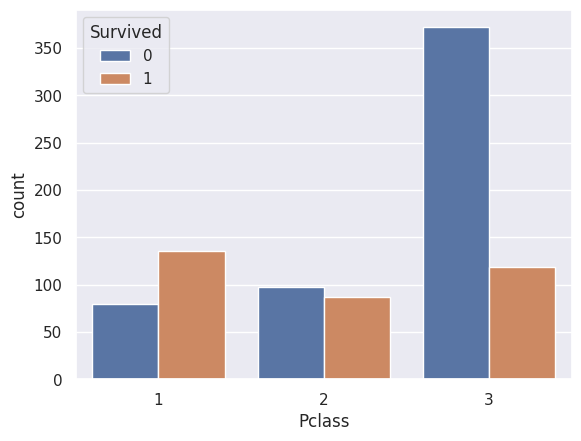

In [26]:
sns.countplot(x='Pclass', hue='Survived', data=df)

In [27]:
df['Sex'].value_counts()

,count
Sex,
0,577
1,314


In [28]:
df['Embarked'].value_counts()

,count
Embarked,
0,646
1,168
2,77


In [29]:
df.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1


In [31]:
x = df.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Survived'], axis = 1)
y = df['Survived']

In [32]:
print(x)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  family_size
0         3    0  22.000000      1      0   7.2500         0            2
1         1    1  38.000000      1      0  71.2833         1            2
2         3    1  26.000000      0      0   7.9250         0            1
3         1    1  35.000000      1      0  53.1000         0            2
4         3    0  35.000000      0      0   8.0500         0            1
..      ...  ...        ...    ...    ...      ...       ...          ...
886       2    0  27.000000      0      0  13.0000         0            1
887       1    1  19.000000      0      0  30.0000         0            1
888       3    1  29.699118      1      2  23.4500         0            4
889       1    0  26.000000      0      0  30.0000         1            1
890       3    0  32.000000      0      0   7.7500         2            1

[891 rows x 8 columns]


In [33]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [34]:
x_train, X_test, Y_train, Y_test = train_test_split (x,Y, test_size=0.2, random_state=2)

In [35]:
print(x.shape, x_train.shape, X_test.shape)

(891, 8) (712, 8) (179, 8)


In [36]:
"""***Logistic Regression***"""

model=LogisticRegression()

In [37]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
X_train_p=model.predict(X_train)

X_train_p

training_data_accuracy=accuracy_score(Y_train,X_train_p)
training_data_accuracy

X_test_p = model.predict(X_test)
X_test_p

testing_data_accuracy=accuracy_score(Y_test,X_test_p)
testing_data_accuracy

0.7821229050279329

In [39]:
x_train_prediction = model.predict(x_train)
print(x_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [40]:
training_data_accuracy = accuracy_score(Y_train, x_train_prediction)
print('Accuracy score of Training Data', training_data_accuracy)

Accuracy score of Training Data 0.8089887640449438


In [41]:
X_test_prediction = model.predict(X_test)
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [42]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of Test Data', test_data_accuracy)

Accuracy score of Test Data 0.7821229050279329


In [43]:
# Import the required library
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree Classifier
tree = DecisionTreeClassifier()

# Fit the model with training data
tree.fit(X_train, Y_train)

# Predict on training data
X_train_p_tree = tree.predict(X_train)

# Calculate accuracy on training data
training_data_accuracy_tree = accuracy_score(Y_train, X_train_p_tree)
print('Training data accuracy:', training_data_accuracy_tree)

# Predict on test data
X_test_p_tree = tree.predict(X_test)

# Calculate accuracy on test data
testing_data_accuracy_tree = accuracy_score(Y_test, X_test_p_tree)
print('Testing data accuracy:', testing_data_accuracy_tree)

Training data accuracy: 0.9859550561797753
Testing data accuracy: 0.776536312849162


In [44]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest Classifier
randomf = RandomForestClassifier()

# Fit the model with the training data
randomf.fit(X_train, Y_train)

RandomForestClassifier()

In [45]:
# Predict on training data
X_train_p_rf = randomf.predict(X_train)

In [46]:
# Calculate accuracy on training data
training_data_accuracy_rf = accuracy_score(Y_train, X_train_p_rf)
print('Training data accuracy (Random Forest):', training_data_accuracy_rf)

Training data accuracy (Random Forest): 0.9859550561797753


In [47]:
# Predict on test data
X_test_p_rf = randomf.predict(X_test)

In [48]:
# Calculate accuracy on test data
testing_data_accuracy_rf = accuracy_score(Y_test, X_test_p_rf)
print('Testing data accuracy (Random Forest):', testing_data_accuracy_rf)

Testing data accuracy (Random Forest): 0.8100558659217877


In [49]:
"""***Optimized and Hyperperameter Tuning of Decesion Tree***"""

from sklearn.model_selection import GridSearchCV
model_tree = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_leaf_nodes': [None, 10, 20, 50]
}

In [50]:
grid_search = GridSearchCV(estimator=model_tree, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)


best_model_tree = DecisionTreeClassifier(**best_params)
best_model_tree.fit(X_train, Y_train)

Best Parameters: {'max_depth': 10, 'max_leaf_nodes': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}


DecisionTreeClassifier(max_depth=10, max_leaf_nodes=20, min_samples_leaf=5)

In [51]:
# Training accuracy
X_train_p_tree = best_model_tree.predict(X_train)
training_data_accuracy_tree = accuracy_score(Y_train, X_train_p_tree)
print("Optimized Decision Tree Training Data Accuracy:", training_data_accuracy_tree)

Optimized Decision Tree Training Data Accuracy: 0.8707865168539326


In [52]:
# Testing accuracy
X_test_p_tree = best_model_tree.predict(X_test)
testing_data_accuracy_tree = accuracy_score(Y_test, X_test_p_tree)
print("Optimized Decision Tree Testing Data Accuracy:", testing_data_accuracy_tree)

Optimized Decision Tree Testing Data Accuracy: 0.770949720670391


In [53]:
from flask import Flask, request, render_template
import pickle
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [54]:
app = Flask(__name__)

# Load the trained model (you'll save the trained model first)
model = best_model_tree  # Use the trained decision tree model

In [55]:
from flask import Flask, request, render_template
import numpy as np
import pickle

app = Flask(__name__)

# Load the trained model
model = best_model_tree  # Use the trained decision tree model (ensure the model is defined)

@app.route('/')
def home():
    return render_template('index.html')  # This is your HTML form

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get data from form
        Pclass = int(request.form['Pclass'])
        Sex = int(request.form['Sex'])
        Age = float(request.form['Age'])
        Fare = float(request.form['Fare'])
        Embarked = int(request.form['Embarked'])

        # Create feature array for prediction
        features = np.array([['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']])

        # Make a prediction using the trained model
        prediction = model.predict(features)

        # Return result based on the prediction
        if prediction[0] == 1:
            result = "Survived"
        else:
            result = "Did not survive"

        # Render the HTML template and pass the result back to the user
        return render_template('index.html', prediction_text=f'Passenger Survival Prediction: {result}')

    except Exception as e:
        # In case of error, return an error message to the user
        return render_template('index.html', prediction_text=f"Error: {str(e)}")

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [56]:
import os

# Create 'templates' folder
if not os.path.exists('templates'):
    os.makedirs('templates')


In [57]:
# Write HTML to file
with open('/content/templates/index.html', 'w') as f:
  f.write('''<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Passenger Survival Prediction</title>
</head>
<body>
    <h2>Enter Passenger Details</h2>
    <form action="/predict" method="POST">
        <label for="Pclass">Passenger Class (1, 2, 3):</label>
        <input type="text" id="Pclass" name="Pclass" required><br>

        <label for="Sex">Sex (0 for male, 1 for female):</label>
        <input type="text" id="Sex" name="Sex" required><br>

        <label for="Age">Age:</label>
        <input type="text" id="Age" name="Age" required><br>

        <label for="Fare">Fare:</label>
        <input type="text" id="Fare" name="Fare" required><br>

        <label for="Embarked">Embarked (0 for C, 1 for Q, 2 for S):</label>
        <input type="text" id="Embarked" name="Embarked" required><br>

        <input type="submit" value="Predict">
    </form>

    <h2>{{ prediction_text }}</h2>
</body>
</html>''')

print('index.html created in the templates folder')

index.html created in the templates folder


In [58]:
import pickle

# Save the model
with open('best_model_tree.pkl', 'wb') as file:
    pickle.dump(best_model_tree, file)

In [59]:
# In app.py
with open('best_model_tree.pkl', 'rb') as file:
    model = pickle.load(file)